1. Import libraries and read the dataset.

In [249]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy

from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_columns=100

## Load Data and check data properties

In [250]:
df = pd.read_csv("kc_house_data.csv")

In [251]:
print (df.columns)
print(df.info())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     2

In [252]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [253]:
df.head(10).sort_values(by='price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [254]:
# Create a working copy of dataframe
df_house = df.copy()

In [255]:
# drop duplicates
print ("Records before removing duplicates %.0f" %len(df_house))
df_house = df_house.drop_duplicates()
print ("Records after removing duplicates %.0f" %len(df_house))

Records before removing duplicates 21613
Records after removing duplicates 21613


In [256]:
# Check unique values in columns:
for col in df_house.columns:
    print ("%s - Unique items: %.0f" %(col, len(df_house[col].unique())))

id - Unique items: 21436
date - Unique items: 372
price - Unique items: 4028
bedrooms - Unique items: 13
bathrooms - Unique items: 30
sqft_living - Unique items: 1038
sqft_lot - Unique items: 9782
floors - Unique items: 6
waterfront - Unique items: 2
view - Unique items: 5
condition - Unique items: 5
grade - Unique items: 12
sqft_above - Unique items: 946
sqft_basement - Unique items: 306
yr_built - Unique items: 116
yr_renovated - Unique items: 70
zipcode - Unique items: 70
lat - Unique items: 5034
long - Unique items: 752
sqft_living15 - Unique items: 777
sqft_lot15 - Unique items: 8689


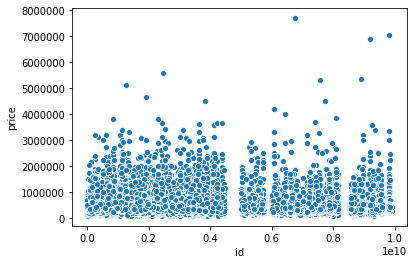

No of Unique values:  21436


In [257]:
# check if there is any relation between ID and Price 
sns.scatterplot(x=df_house.id, y=df_house.price,data=df_house)
plt.show()
print ("No of Unique values: ", len(df_house.id.unique()))

There too much randomness in data and no collinear relation between ID and Price. There are 2146 unique values so it cannot be categorial variable too.

Hence we can drop this column safely

In [258]:
## Drop ID Column
df_house.drop(['id'],axis = 1, inplace = True)

In [259]:
# Extract only year part from date column and check if there is any relation between year and price
df_house.date = [x[:4] for x in df['date'] ]
df_house.date = df_house.date.astype('int64')

In [260]:
print (df_house.date.describe())
print (df_house.date.unique())

count    21613.000000
mean      2014.322954
std          0.467616
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: date, dtype: float64
[2014 2015]


In [261]:
# There are only two years in date columns we can make it categorical by converting them into 0 and 1
df_house.date = OneHotEncoder(sparse=False).fit_transform(np.reshape(df_house['date'].values,(-1,1)))

/var/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [262]:
#Identify Continious numerical columns 
#Categorical - bedrooms, floors, waterfront, view, yr_renovated
cat_cols = list(['date','bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode'])
num_cols = list(set(df_house.columns) - set(cat_cols))
for col in cat_cols:
    print (col, df_house[col].unique(), len(df_house[col].unique()),"\n")

date [1. 0.] 2 

bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33] 13 

bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ] 30 

floors [1.  2.  1.5 3.  2.5 3.5] 6 

waterfront [0 1] 2 

view [0 3 4 2 1] 5 

condition [3 5 4 1 2] 5 

grade [ 7  6  8 11  9  5 10 12  4  3 13  1] 12 

zipcode [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039] 70 



In [263]:
df_skew = df_house.skew()
df_corr = df_house.corr()['price']
stat_matrix = pd.DataFrame(data={"Col_Name":df_corr.index, "Skewness":df_skew, "corr_price": df_corr})
stat_matrix.index=range(0,len(stat_matrix))
stat_matrix

,Col_Name,Skewness,corr_price
0,date,-0.757299,-0.003576
1,price,4.024069,1.000000
2,bedrooms,1.974300,0.308350
3,bathrooms,0.511108,0.525138
4,sqft_living,1.471555,0.702035
5,sqft_lot,13.060019,0.089661
6,floors,0.616177,0.256794
7,waterfront,11.385108,0.266369
8,view,3.395750,0.397293
9,condition,1.032805,0.036362


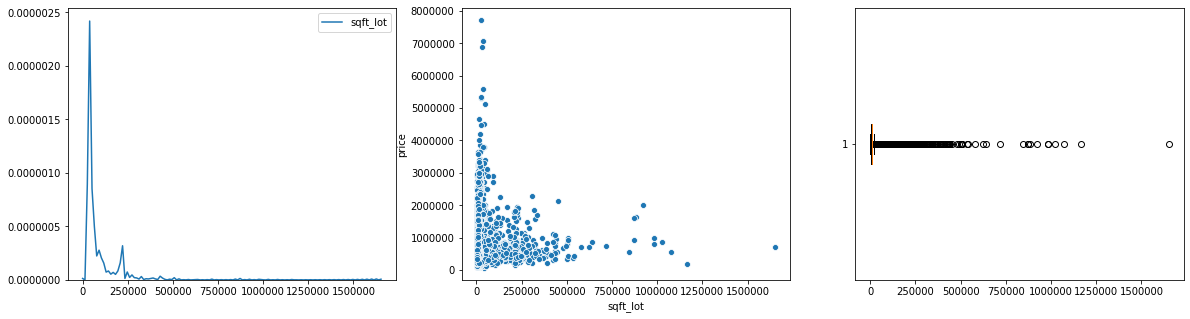

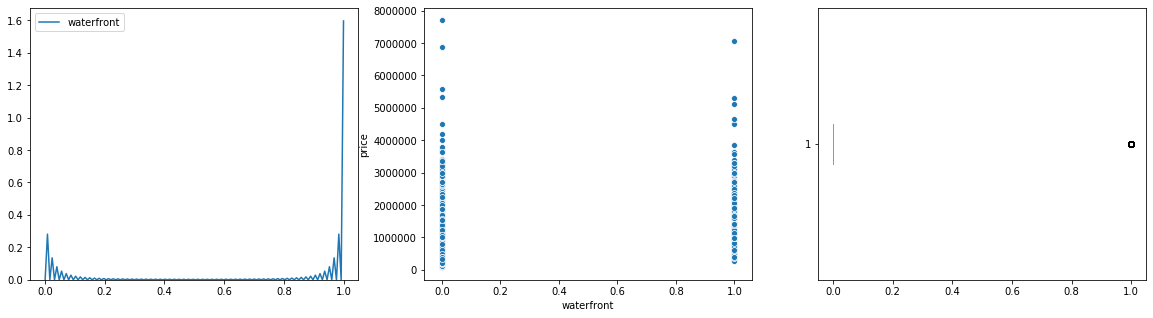

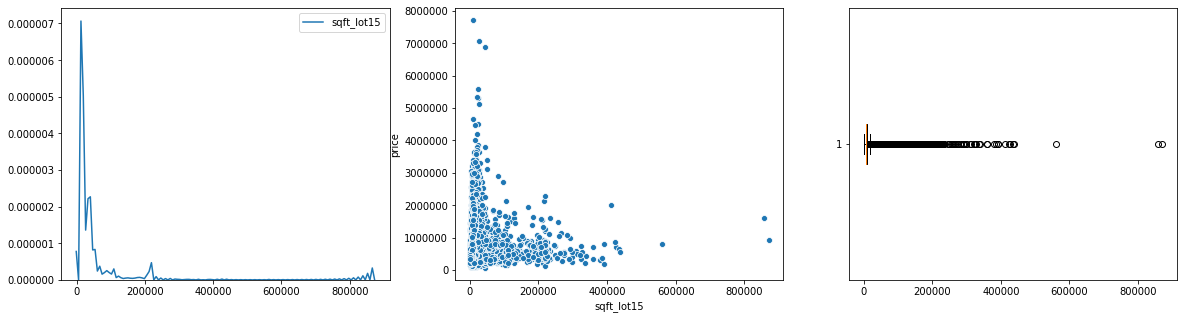

In [264]:
check_cols = ['sqft_lot','waterfront','sqft_lot15']
for col in check_cols:
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    sns.kdeplot(df_house[col],ax=ax[0])
    sns.scatterplot(df_house[col],df_house['price'],ax =ax[1])
    ax[2] = plt.boxplot(df_house[col],vert=False)
    plt.show()

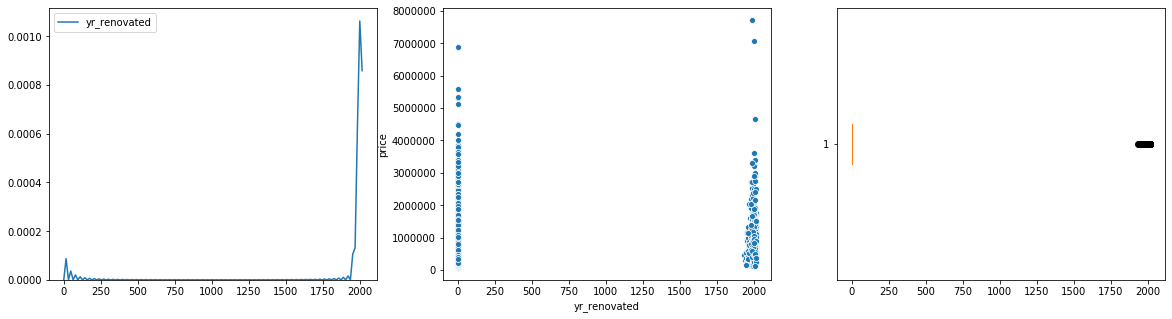

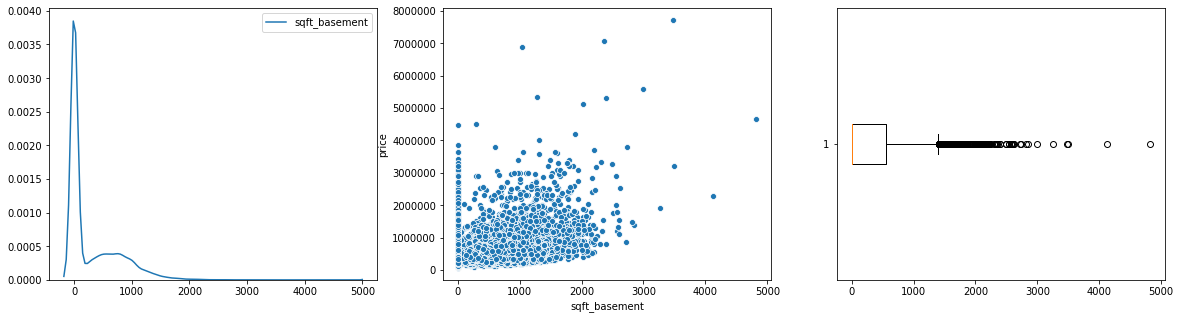

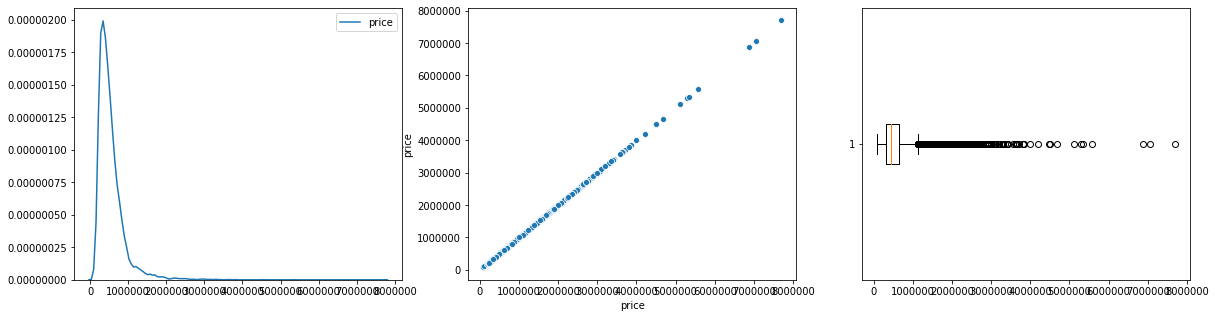

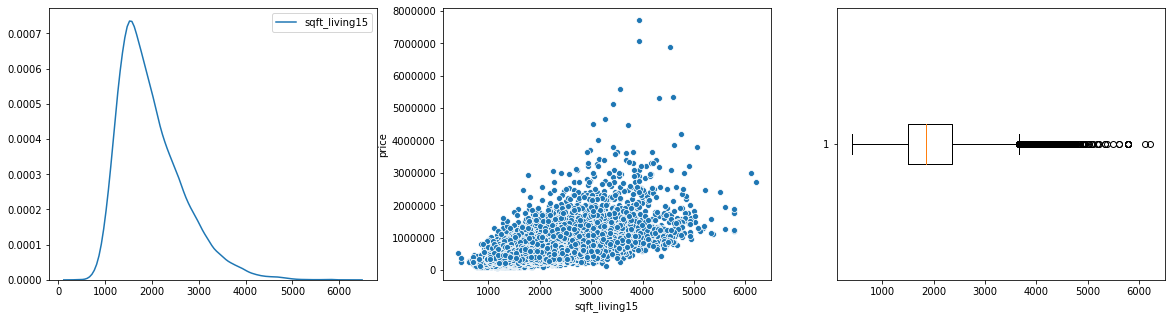

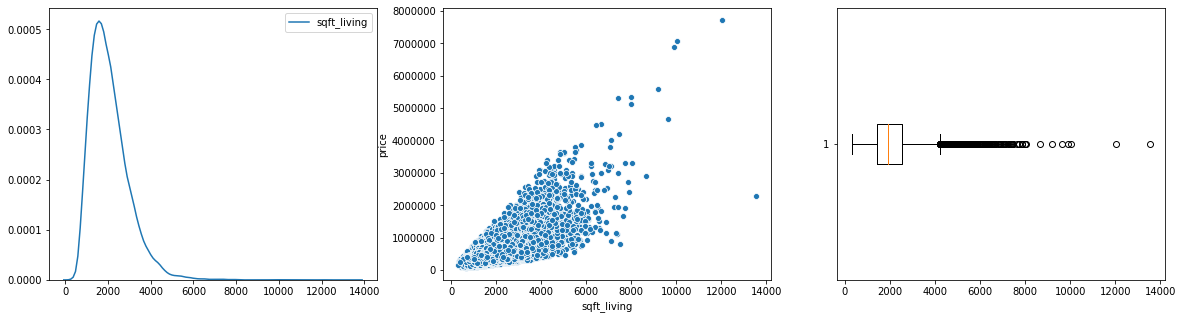

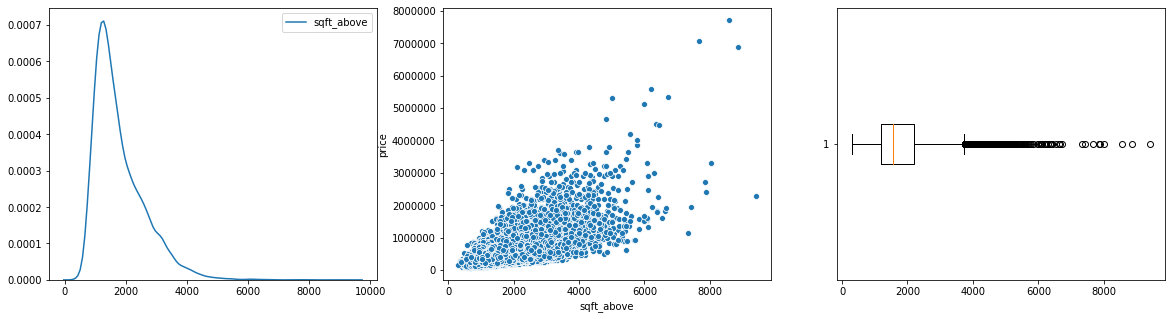

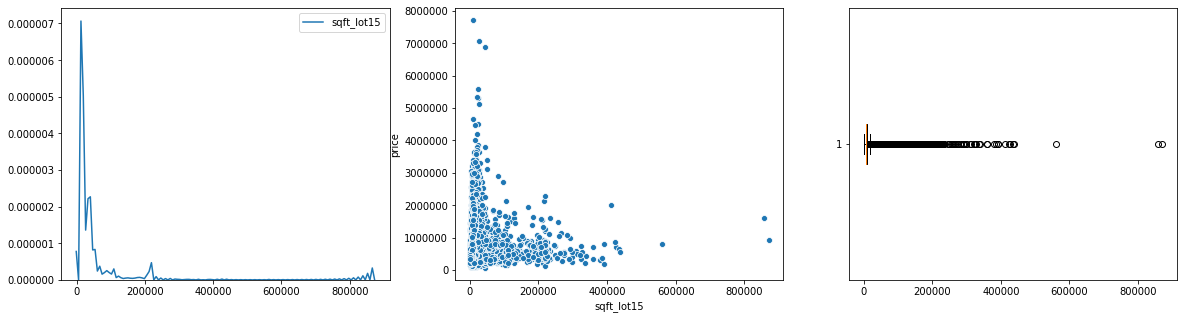

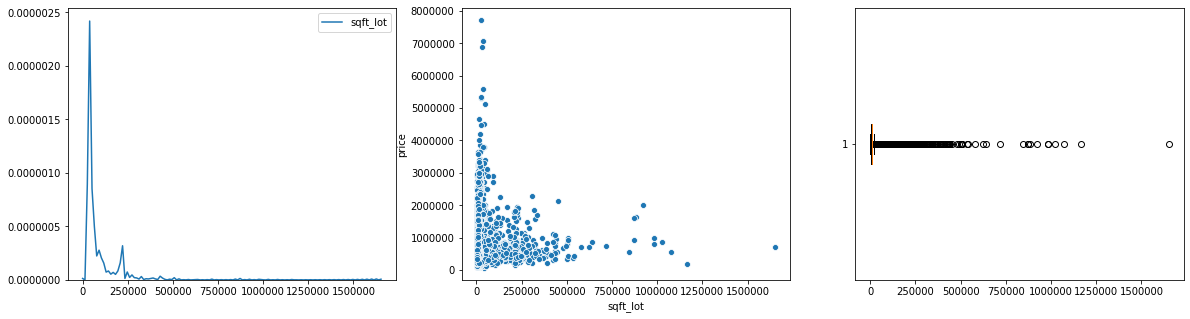

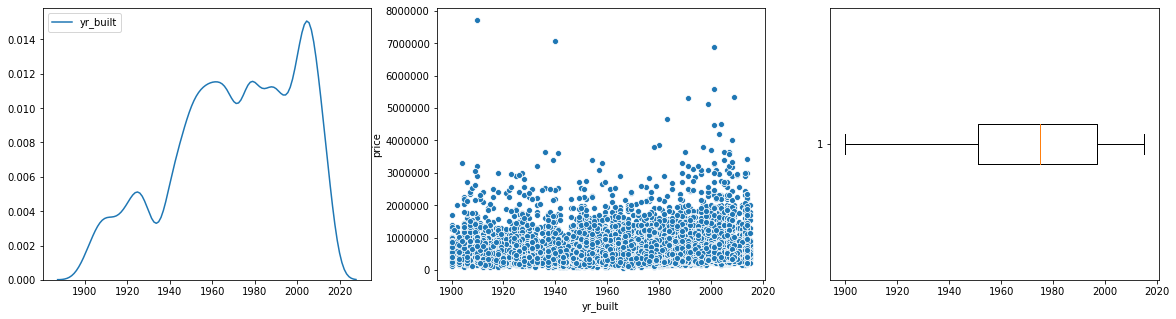

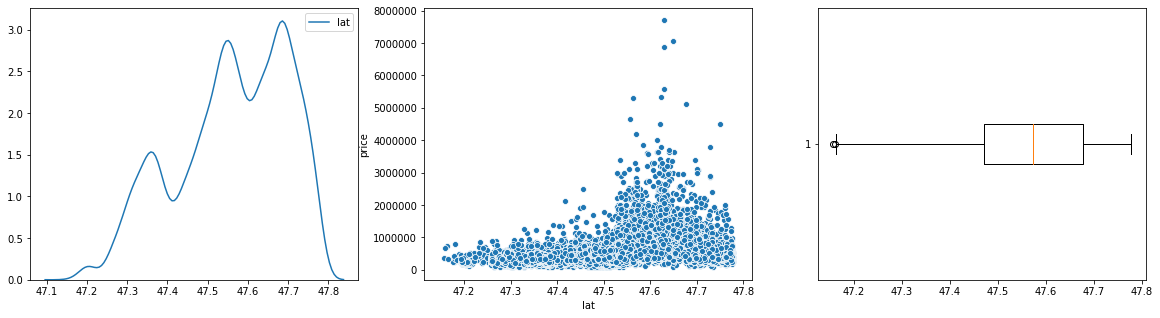

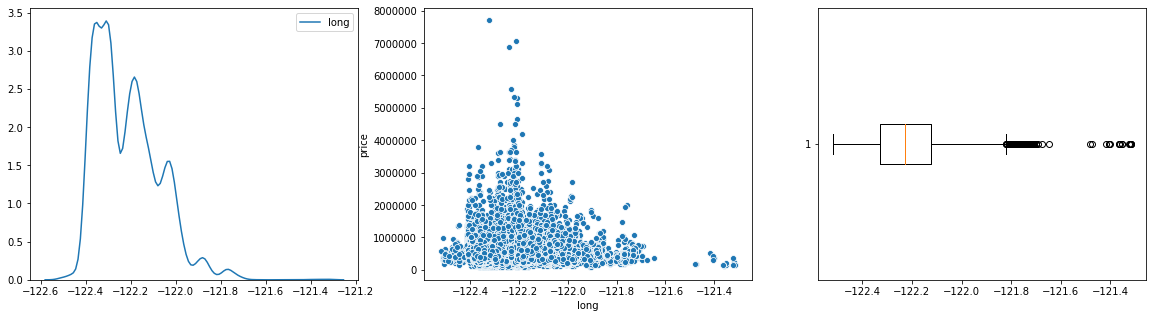

In [265]:
# check distribution of continious variables:
for col in num_cols:
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    sns.kdeplot(df_house[col],ax=ax[0])
    sns.scatterplot(df_house[col],df_house['price'],ax =ax[1])
    ax[2] = plt.boxplot(df_house[col],vert=False)
    plt.show()

1. yr_built - We can see multiple peaks(Further analysis can be done to find reason for peaks); No collinearity visisble
2. sqft_above - collinearity with heteroscedasticity. There are ouliers which needs to be treated
3. sqft_living - collinearity with heteroscedasticity. There are ouliers which needs to be treated
4. long - We can see multiple peaks(Further analysis can be done to find reason for peaks); No collinearity visisble
5. sqft_living15 - collinearity with heteroscedasticity. There are ouliers which needs to be treated
6. sqft_basement - Weak collinearity and heteroscedasticity. Most of the data is at 0. This data eveen after removing outlier will be bad for linear regression. Further analysis required to see if this should be transformed or deleted
7. lat - There may be weak collinearity
8. yr_renovated - Most of the data is around 0, this is bad for linear model. Further analysis required to see if this should be transformed or deleted

In [266]:
# We can see that there is very high skewness in sqft_lot, waterfront and sqft_lot15. 
# These features also have very low correlation with Target variable. Hence these can be dropped 

In [267]:
col_name = 'yr_renovated'
print ("Zeros in %s  is : %0.2f %%" % (col_name, len(df_house[col_name][df_house[col_name]==0])/  len(df_house[col_name])*100))

Zeros in yr_renovated  is : 95.77 %


In [268]:
col_name = 'sqft_basement'
print ("Zeros in %s  is : %0.2f %%" % (col_name, len(df_house[col_name][df_house[col_name]==0])/  len(df_house[col_name])*100))

Zeros in sqft_basement  is : 60.73 %


In [270]:
# Display corr for general overview
df_house.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,-0.003576,0.009838,0.026596,0.029038,-0.005468,0.022315,0.004165,-0.001364,0.045589,0.030387,0.023823,0.015687,-0.003507,0.023707,-0.001189,0.029212,-0.000270,0.021734,0.000085
price,-0.003576,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.009838,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.026596,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.029038,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.005468,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.022315,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.004165,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.001364,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.045589,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [271]:
# sqft_living has high collinearity with most of the variable including price 
# We can combine sqft_above and sqft_living15 as these two are related to each other
df_house['sq_ft_new'] = df_house['sqft_above'] + df_house['sqft_living15']
df_house.drop(labels=['sqft_above','sqft_living15'],axis=1, inplace=True)

In [272]:
# Display only those Cols and Rows that have high correlation >0.7
df_house.corr()[(df_house.corr()>0.5) & (df_house.corr()<1)].dropna(axis=1,how="all").dropna(axis=0,how="all")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,sqft_lot15,sq_ft_new
price,NaN,NaN,0.525138,0.702035,NaN,NaN,0.667434,NaN,NaN,0.640493
bedrooms,NaN,NaN,0.515884,0.576671,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.525138,0.515884,NaN,0.754665,NaN,0.500653,0.664983,0.506019,NaN,0.679223
sqft_living,0.702035,0.576671,0.754665,NaN,NaN,NaN,0.762704,NaN,NaN,0.882922
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.718557,NaN
floors,NaN,NaN,0.500653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,0.667434,NaN,0.664983,0.762704,NaN,NaN,NaN,NaN,NaN,0.791000
yr_built,NaN,NaN,0.506019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot15,NaN,NaN,NaN,NaN,0.718557,NaN,NaN,NaN,NaN,NaN
sq_ft_new,0.640493,NaN,0.679223,0.882922,NaN,NaN,0.791000,NaN,NaN,NaN


In [273]:
# Display only those Cols and Rows that have low correlation with Target Variable <0.1
df_house.corr()[(df_house.corr()<0.1) & (df_house.corr()>-0.1) ]['price'].dropna(axis=0,how="all")

date         -0.003576
sqft_lot      0.089661
condition     0.036362
yr_built      0.054012
zipcode      -0.053203
long          0.021626
sqft_lot15    0.082447
Name: price, dtype: float64

# We can start building model now

In [274]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.svm import SVR

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [275]:
X = df_house.copy()
y = X.pop('price')
#X = X.loc[:,['sqft_living','bathrooms','bedrooms']]

In [276]:
# First step for building model and data transformation is to split the data in Test and Train ( CV will be managed by cross_val_package)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [278]:
X_train_std = preprocessing.PolynomialFeatures(2).fit_transform(X_train)
X_test_std = preprocessing.PolynomialFeatures(2).fit_transform(X_test)

In [279]:
model = LinearRegression(normalize=False)
model.fit(X_train_std,y_train)
print (model.score(X_test_std,y_test)*100)
cv_score = cross_val_score(model,X_train_std,y_train,scoring="r2",cv=10,n_jobs=-1)
print (cv_score.mean()*100)
print (cv_score)
print ("\n", model)

83.61326484734064
80.42315842113122
[0.80161919 0.82530661 0.78919705 0.81856548 0.81040229 0.78644027
 0.81103586 0.79847103 0.78360483 0.81767322]

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [280]:
model = GradientBoostingRegressor(n_estimators=100,max_depth=5)
model.fit(X_train_std,y_train)
print (model.score(X_test_std,y_test))
cv_score = cross_val_score(model,X_train_std,y_train,scoring="r2",cv=5,n_jobs=-1)
print (cv_score.mean()*100)
print (cv_score)
print ("\n", model)

0.8788580243878441
88.1922299619912
[0.88097878 0.88744411 0.86680922 0.88396412 0.89041528]

 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [281]:
model = RandomForestRegressor()
model.fit(X_train_std,y_train)
print (model.score(X_test_std,y_test))
cv_score = cross_val_score(model,X_train_std,y_train,scoring="r2",cv=5,n_jobs=-1)
print (cv_score.mean()*100)
print (cv_score)
print ("\n", model)

/var/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8569962963963161
85.0346692172008
[0.8168951  0.86182693 0.84851259 0.86776206 0.85673677]

 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


1. Tried removing and making the feature complex - Even by deleting the least importand feature or removing outliers the accuracy drops.
2. The best accuracy is provided by GradientBoostRegressor